Let's identify coins!
in the image given below we want to detect each coin currency,
and we'll do it with cv2.HoughCircles!



In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess 
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_04b_hough_transform/ex4b/coins.png'.split())



In [2]:
from matplotlib import pyplot as plt
import cv2

figsize = (10, 10)



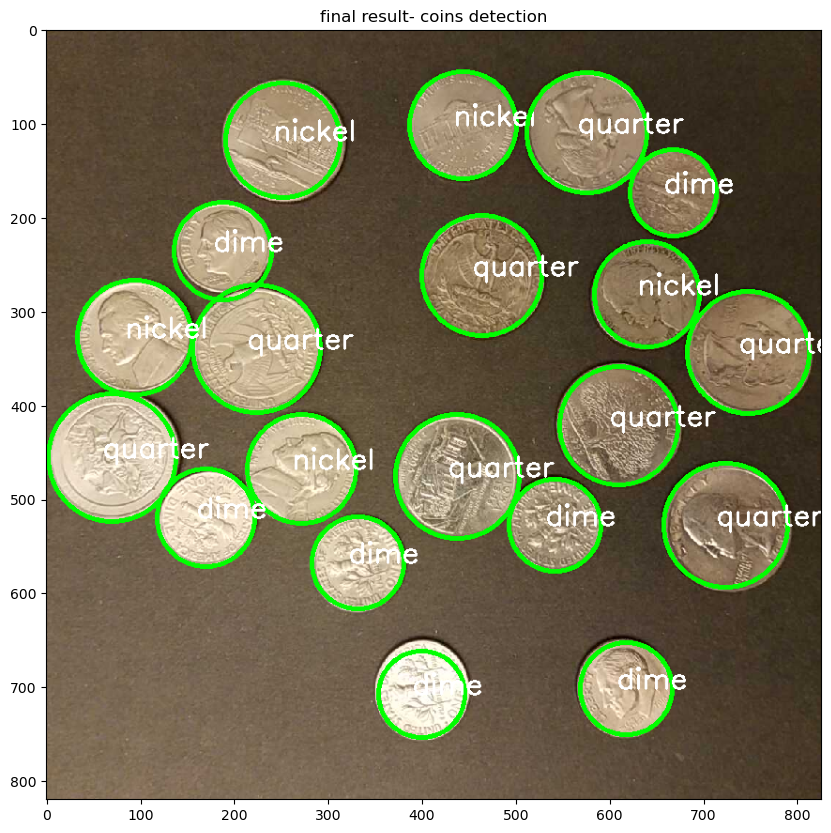

In [41]:
import math
import numpy as np 
im3 = cv2.imread("coins.png")
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im3, cv2.COLOR_RGB2GRAY)
res = im3.copy()

# TODO: fill in the best values possible 
# to detect the right circle dimeter and place
acc_ratio = 1
min_dist = 25
canny_upper_th = 150
acc_th = 35
circles = cv2.HoughCircles(im, cv2.HOUGH_GRADIENT, acc_ratio,
                           min_dist, param1=canny_upper_th,
                           param2=acc_th, minRadius=40, maxRadius=70)

#=== font vars
font = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale = 1
fontColor = (255, 255, 255)
lineType = 2

# ==== for each detected circle
circles = np.uint16(np.around(circles))
circles = circles[0]

for xyr in circles:
    
    # draw the outer circle
    a ,b, r = xyr.flatten()
    #a , b,r = round(a), round(b), round(r)
    
    res = cv2.circle(res, (a, b), r, (0, 255, 0), 3)
    right_padding = 10
    bottomLeftCornerOfText = (int(a-right_padding), int(b))
    if 63 <= r: 
      cv2.putText(res,"quarter",bottomLeftCornerOfText, font,fontScale,(255,255,255),lineType)
    elif 53 <= r <= 62:  
      cv2.putText(res,"nickel",bottomLeftCornerOfText, font,fontScale,fontColor,lineType)
    elif  40 <=  r <= 52:
      cv2.putText(res,"dime",bottomLeftCornerOfText, font,fontScale,(255,255,255),lineType)


    
    # TODO: write currency type on each coin.
    # use cv2.putText() and the font vars above.
    # If you need, different coin sizes can be found here:
    # https://avocadoughtoast.com/weights-sizes-us-coins/


plt.figure(figsize=figsize)
plt.imshow(res)
plt.title("final result- coins detection")
plt.show()

